### Linear Regression from scratch

In [218]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Dict, Tuple, List
from sklearn.datasets import make_regression, make_classification
from numpy import ndarray
import random

In [219]:
features, labels = make_regression(n_samples = 30000, n_features=5)

In [220]:
int(len(features) * 0.8)

24000

In [221]:
X_train, y_train = features[0: int(len(features) * 0.8)], labels[0: int(len(labels) * 0.8)]
X_test, y_test = features[int(len(features) * 0.8):], labels[int(len(features)*0.8):]

In [222]:
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

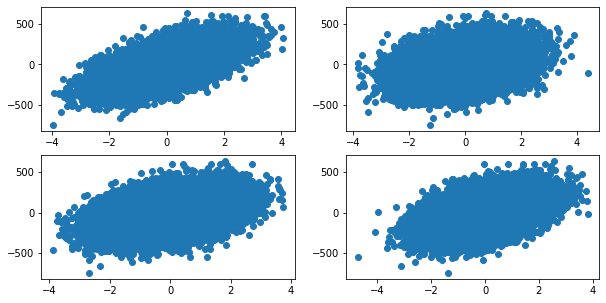

In [223]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,5))

ax[0,0].scatter(features[:, 0], labels)
ax[0,1].scatter(features[:, 1], labels)
ax[1,0].scatter(features[:, 2], labels)
ax[1,1].scatter(features[:, 3], labels)

Okay, we have the data. What is next?

- Loss Function
- Optimizer -> This time I will include it in the training loop, and then look if I can write a cleaner code.
- Model

In [224]:
def MSE(preds, actuals):
    return np.mean(np.power(preds - actuals, 2))

In [225]:
def linreg(X: ndarray, 
           y: ndarray, 
           weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    M = np.dot(X, weights['W'])
    N = M + weights['B']
    
    L = MSE(N, y)
    
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['y'] = y
    forward_info['M'] = M
    forward_info['N'] = N
    forward_info['loss'] = L
    
    return forward_info

In [226]:
x = np.array([[1,2,3,4],
            [5,6,7,8]])
x.sum(axis = 0, keepdims = True)

array([[ 6,  8, 10, 12]])

In [227]:
def backprop(forward_info: Dict[str, ndarray],
            weights: Dict[str, ndarray]):
    dLdN = -2 * (forward_info['y'] - forward_info['N'])
    dNdM = np.ones_like(forward_info['M'])
    dNdB = np.ones_like(weights['B'])
    
    dLdM = dLdN * dNdM
    dLdB = (dLdN * dNdB).sum(axis = 0)
    
    dMdW = np.transpose(forward_info['X'], (1,0))
    dLdW = np.dot(dMdW, dLdM)
    
    backprop_info: Dict[str, ndarray] = {}
    backprop_info['W'] = dLdW
    backprop_info['B'] = dLdB
    
    return backprop_info

In [228]:
def data_iter(features, labels, batch_size):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
        
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
    
    yield features[batch_indices], labels[batch_indices]

In [229]:
def weight_init(n_features):
    weights: Dict[str, ndarray] = {}
    weights['W'] = np.random.randn(n_features, 1)
    weights['B'] = np.zeros(1)
    
    return weights

In [230]:
def SGD(parameters: Dict[str, ndarray], 
        lr: float, 
        batch_size: int , 
        backprop_info: Dict[str, ndarray]):
    for key in parameters.keys():
        parameters[key] -= grads[key] * lr

In [231]:
wgts = weight_init(X_train.shape[1])

In [232]:
batch_size = 25
num_epochs = 100
lr = 0.01
losses = []
for epoch in range(num_epochs):
    for X, y in data_iter(X_train, y_train, batch_size):
        preds = linreg(X, y, wgts)
        grads = backprop(preds, wgts)
        SGD(wgts, lr, batch_size, grads)
    if epoch % 5 == 0:
        losses.append(MSE(preds['N'], y))

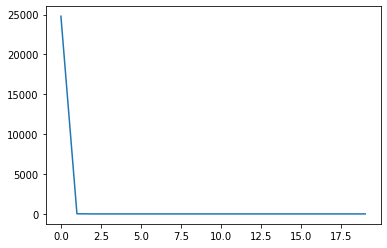

In [233]:
plt.plot(losses)

In [234]:
MSE(predict(X_test, wgts), y_test)

3.9258496437890664e-28

In [188]:
def predict(X: ndarray, weights: Dict[str, ndarray]):
    M = np.dot(X, weights['W'])
    N = M + weights['B']
    return N